Task No 2 
Inter Name: AKAASH CHATTERJEE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import io
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving NSE-TATAGLOBAL.csv to NSE-TATAGLOBAL.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['NSE-TATAGLOBAL.csv']))
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [ ]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [ ]:
dfs = df.sort_values(by = 'Date')
dfs.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
dfs.reset_index(inplace=True)

In [ ]:
dfs.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


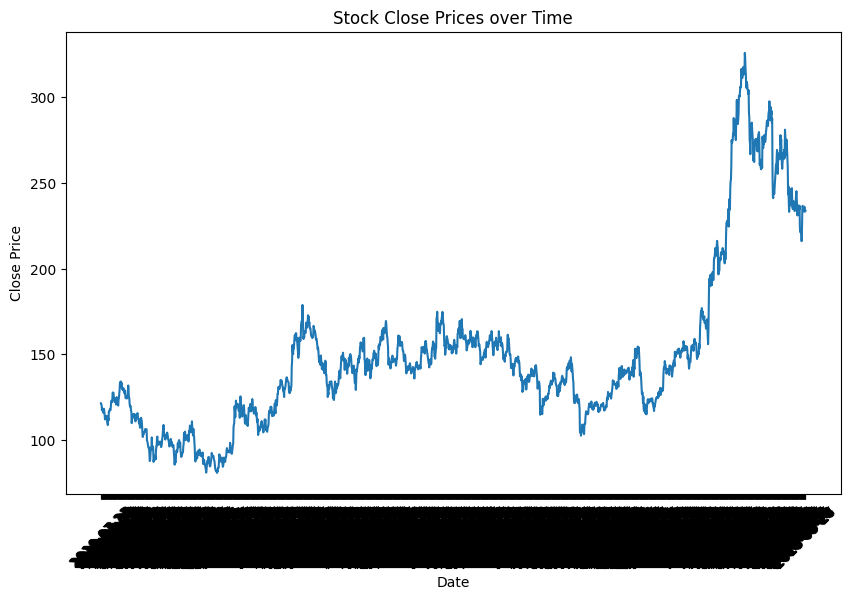

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dfs['Date'], dfs['Close'])
plt.title('Stock Close Prices over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

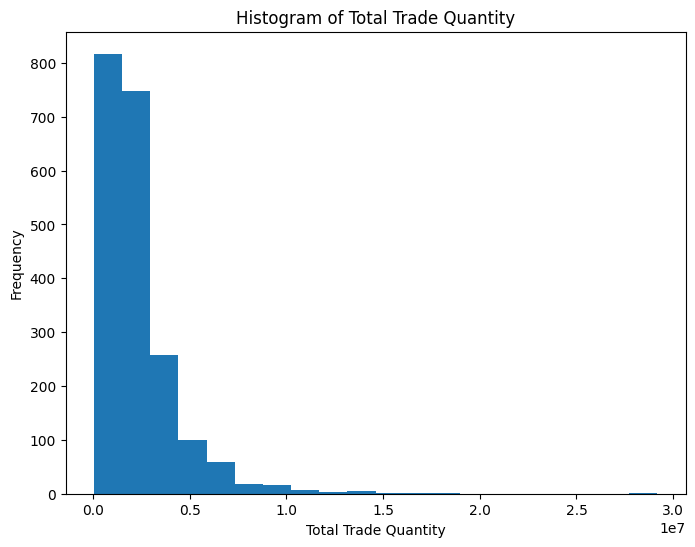

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(dfs['Total Trade Quantity'], bins=20)
plt.title('Histogram of Total Trade Quantity')
plt.xlabel('Total Trade Quantity')
plt.ylabel('Frequency')
plt.show()

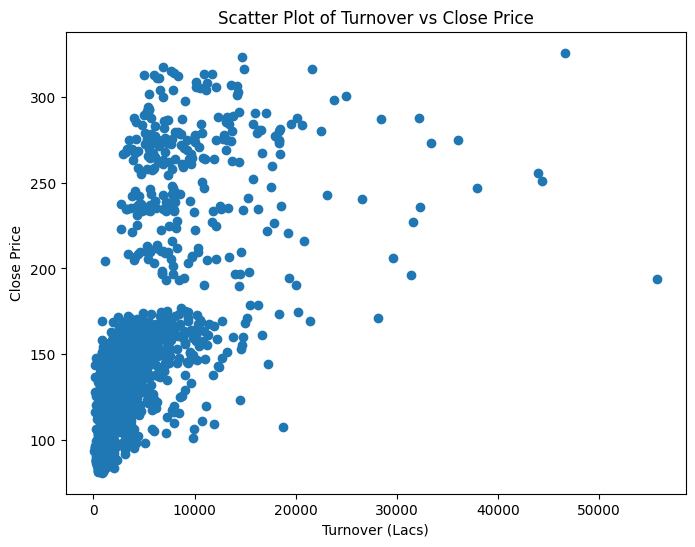

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(dfs['Turnover (Lacs)'], dfs['Close'])
plt.title('Scatter Plot of Turnover vs Close Price')
plt.xlabel('Turnover (Lacs)')
plt.ylabel('Close Price')
plt.show()

Feature Scaling

In [ ]:
cl_dfs = dfs['Close']

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
cl_dfs = scaler.fit_transform(np.array(cl_dfs).reshape(-1,1))

Split the dataset

In [ ]:
train_size = int(len(cl_dfs)*0.7)
test_size = len(cl_dfs) - train_size
train_data,test_data  = cl_dfs[0:train_size,:],cl_dfs[train_size:len(cl_dfs),:1]

In [ ]:
def create_dataset(dataset,time_step=1):
  dataX,dataY = [],[]
  for i in range(len(dataset) - time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX) ,np.array(dataY) 


In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=60,batch_size=64,verbose=1)

Epoch 1/60
21/21 [==============================] - 6s 278ms/step - loss: 5.1091e-04 - val_loss: 0.0081
Epoch 2/60
21/21 [==============================] - 4s 214ms/step - loss: 4.8763e-04 - val_loss: 0.0106
Epoch 3/60
21/21 [==============================] - 5s 221ms/step - loss: 5.1522e-04 - val_loss: 0.0088
Epoch 4/60
21/21 [==============================] - 6s 279ms/step - loss: 4.5638e-04 - val_loss: 0.0050
Epoch 5/60
21/21 [==============================] - 4s 216ms/step - loss: 4.3241e-04 - val_loss: 0.0054
Epoch 6/60
21/21 [==============================] - 5s 260ms/step - loss: 4.2022e-04 - val_loss: 0.0039
Epoch 7/60
21/21 [==============================] - 5s 222ms/step - loss: 4.0349e-04 - val_loss: 0.0028
Epoch 8/60
21/21 [==============================] - 4s 213ms/step - loss: 4.3459e-04 - val_loss: 0.0052
Epoch 9/60
21/21 [==============================] - 6s 280ms/step - loss: 3.8221e-04 - val_loss: 0.0044
Epoch 10/60
21/21 [==============================] - 5s 223ms/st

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 41ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

133.23128294832443

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

203.5600341590518

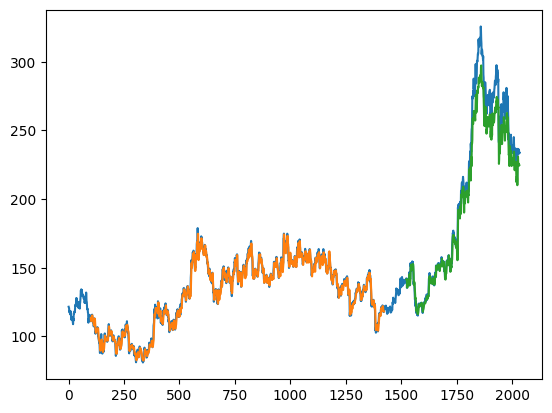

In [ ]:
look_back=100
trainPredictPlot = np.empty_like(cl_dfs)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(cl_dfs)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(cl_dfs)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(cl_dfs))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

611

In [ ]:
pred_input=test_data[511:].reshape(1,-1)
pred_input.shape

(1, 100)

In [ ]:
temp_input = list(pred_input)
temp_input = temp_input[0].tolist()

In [ ]:
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        pred_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,pred_input))
        pred_input=pred_input.reshape(1,-1)
        pred_input = pred_input.reshape((1, n_steps, 1))
        #print(pred_input)
        yhat = model.predict(pred_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        pred_input = pred_input.reshape((1, n_steps,1))
        yhat = model.predict(pred_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.58252865]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464